# Data Training

## import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## read data files

In [2]:
#seed for random gen stuff
#can be changed but must be declared here
#as everything that requires a seed will use this

seed = 10

#labeled data

star3642 = pd.read_csv("Star3642_balanced.csv")
star39552 = pd.read_csv("Star39552_balanced.csv")


#unlabeled data, to label after training model

star9999 = pd.read_csv("Star9999_raw.csv")
star99999 = pd.read_csv("Star99999_raw.csv")


## relabel spectral classes in labeled data

There's too many subcategories for each spectral type so they will be classified into larger bins (might undo later)

In [3]:
#categories

cat = ['A', 'B', 'C', 'F', 'G', 'K', 'M', 'N', 'O', 'W']
encoder = LabelEncoder()
encoder.fit(cat)

#change categories
for i in cat:
    #labeled
    star3642['SpType'] = star3642['SpType'].apply(str).str.replace("^"+i,i)
    star39552['SpType'] = star39552['SpType'].apply(str).str.replace("^"+i,i)

    #unlabeled
    star9999['SpType'] = star39552['SpType'].apply(str).str.replace("^"+i,i)
    star99999['SpType'] = star39552['SpType'].apply(str).str.replace("^"+i,i)


#Labeling categories

star3642['SpType'] = encoder.transform(star3642['SpType'])
star39552['SpType'] = encoder.transform(star39552['SpType'])
#star9999['SpType'] = encoder.transform(star9999['SpType'])
#star99999['SpType'] = encoder.transform(star99999['SpType'])

## START TRAINING !!

Using the methods discussed in class and used in the jupyter notebooks for it.

Will be using the relations Vmag/Plx, Amag/B-V and Amag/Plx

### Vmag vs Plx

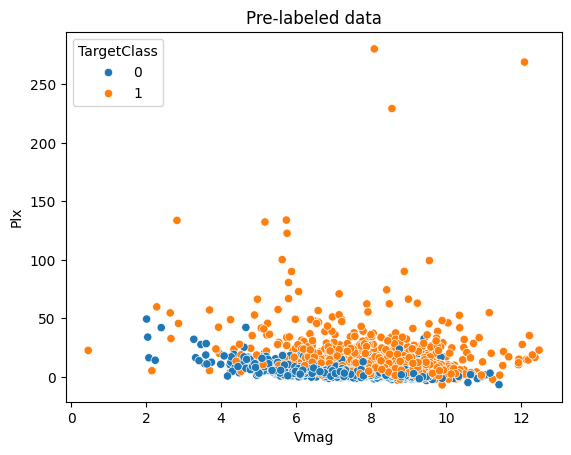

In [4]:
X = star3642[['Vmag', 'Plx']]
y = star3642[['TargetClass']]
xx = star39552[['Vmag', 'Plx']]
yy = star39552[['TargetClass']]

sns.scatterplot(data=X, x=X["Vmag"], y=X["Plx"], hue=y["TargetClass"])
plt.title("Pre-labeled data")
plt.show()

#### Logistic regression

Testing on original data (Star3642)
[[317  54]
 [ 86 272]]
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       371
           1       0.83      0.76      0.80       358

    accuracy                           0.81       729
   macro avg       0.81      0.81      0.81       729
weighted avg       0.81      0.81      0.81       729



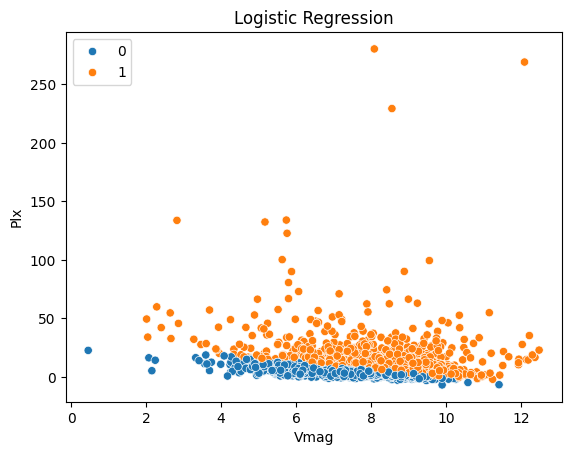

Testing on large labeled data (Star39552)
[[17388  2388]
 [ 7513 12263]]
              precision    recall  f1-score   support

           0       0.70      0.88      0.78     19776
           1       0.84      0.62      0.71     19776

    accuracy                           0.75     39552
   macro avg       0.77      0.75      0.75     39552
weighted avg       0.77      0.75      0.75     39552



In [5]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

#logistic regression model
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Vmag"], y=X["Plx"], hue=y_pred)
plt.title("Logistic Regression")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Naive Bayes

Testing on original data (Star3642)
[[356  15]
 [247 111]]
              precision    recall  f1-score   support

           0       0.59      0.96      0.73       371
           1       0.88      0.31      0.46       358

    accuracy                           0.64       729
   macro avg       0.74      0.63      0.59       729
weighted avg       0.73      0.64      0.60       729



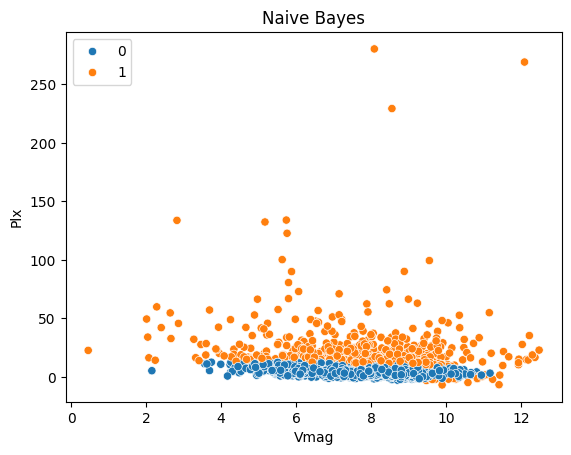

Testing on large labeled data (Star39552)
[[18996   780]
 [13899  5877]]
              precision    recall  f1-score   support

           0       0.58      0.96      0.72     19776
           1       0.88      0.30      0.44     19776

    accuracy                           0.63     39552
   macro avg       0.73      0.63      0.58     39552
weighted avg       0.73      0.63      0.58     39552



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

model = GaussianNB()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Vmag"], y=X["Plx"], hue=y_pred)
plt.title("Naive Bayes")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### K-nearest neighbor

Testing on original data (Star3642)
[[298  73]
 [ 92 266]]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       371
           1       0.78      0.74      0.76       358

    accuracy                           0.77       729
   macro avg       0.77      0.77      0.77       729
weighted avg       0.77      0.77      0.77       729



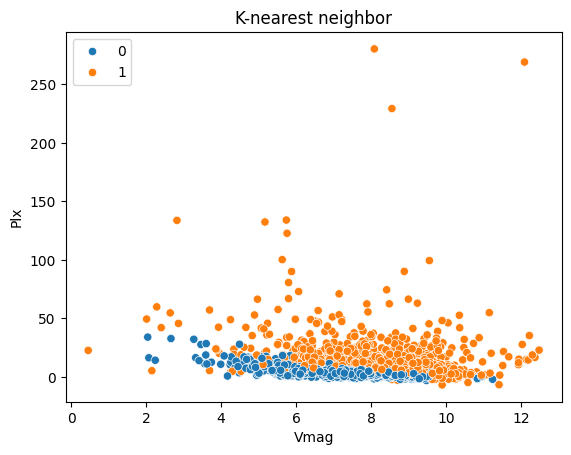

Testing on large labeled data (Star39552)
[[16381  3395]
 [ 7143 12633]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     19776
           1       0.79      0.64      0.71     19776

    accuracy                           0.73     39552
   macro avg       0.74      0.73      0.73     39552
weighted avg       0.74      0.73      0.73     39552



In [7]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Vmag"], y=X["Plx"], hue=y_pred)
plt.title("K-nearest neighbor")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Decision Tree

Testing on original data (Star3642)
[[286  85]
 [104 254]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       371
           1       0.75      0.71      0.73       358

    accuracy                           0.74       729
   macro avg       0.74      0.74      0.74       729
weighted avg       0.74      0.74      0.74       729



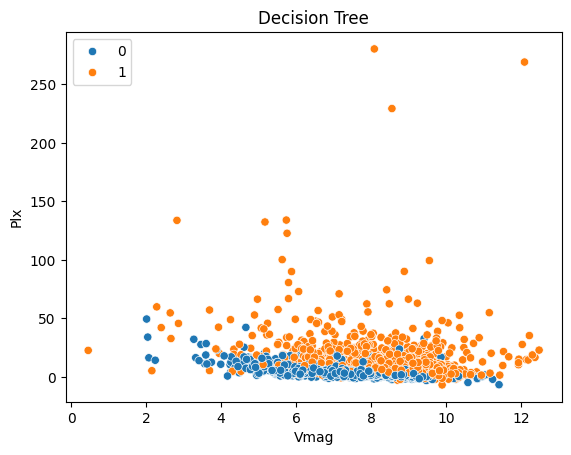

Testing on large labeled data (Star39552)
[[15643  4133]
 [ 7272 12504]]
              precision    recall  f1-score   support

           0       0.68      0.79      0.73     19776
           1       0.75      0.63      0.69     19776

    accuracy                           0.71     39552
   macro avg       0.72      0.71      0.71     39552
weighted avg       0.72      0.71      0.71     39552



In [8]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Vmag"], y=X["Plx"], hue=y_pred)
plt.title("Decision Tree")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Random Forest

Testing on original data (Star3642)
[[301  70]
 [ 87 271]]
              precision    recall  f1-score   support

           0       0.78      0.81      0.79       371
           1       0.79      0.76      0.78       358

    accuracy                           0.78       729
   macro avg       0.79      0.78      0.78       729
weighted avg       0.79      0.78      0.78       729



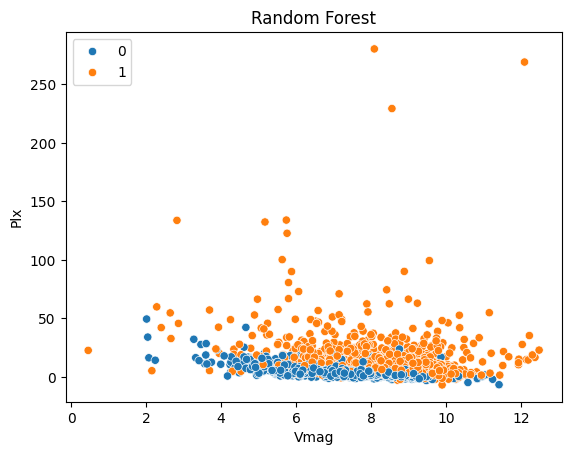

Testing on large labeled data (Star39552)
[[16909  2867]
 [ 7143 12633]]
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     19776
           1       0.82      0.64      0.72     19776

    accuracy                           0.75     39552
   macro avg       0.76      0.75      0.74     39552
weighted avg       0.76      0.75      0.74     39552



In [9]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Vmag"], y=X["Plx"], hue=y_pred)
plt.title("Random Forest")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Incorporating PCA

Testing on original data (Star3642)
[[305  66]
 [ 86 272]]
              precision    recall  f1-score   support

           0       0.78      0.82      0.80       371
           1       0.80      0.76      0.78       358

    accuracy                           0.79       729
   macro avg       0.79      0.79      0.79       729
weighted avg       0.79      0.79      0.79       729



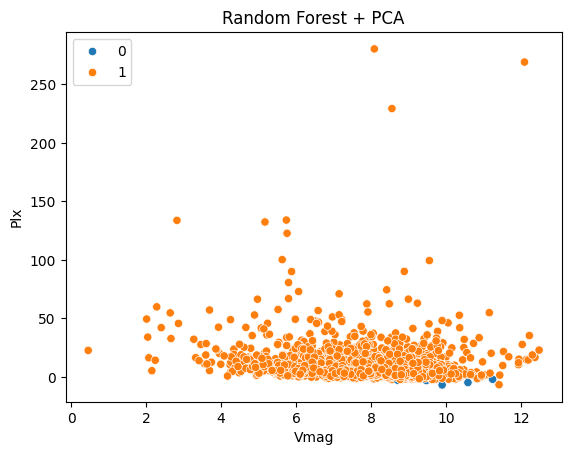

Testing on large labeled data (Star39552)
[[   52 19724]
 [   42 19734]]
              precision    recall  f1-score   support

           0       0.55      0.00      0.01     19776
           1       0.50      1.00      0.67     19776

    accuracy                           0.50     39552
   macro avg       0.53      0.50      0.34     39552
weighted avg       0.53      0.50      0.34     39552



In [10]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=seed)

model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Vmag"], y=X["Plx"], hue=y_pred)
plt.title("Random Forest + PCA")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

### Amag vs Plx

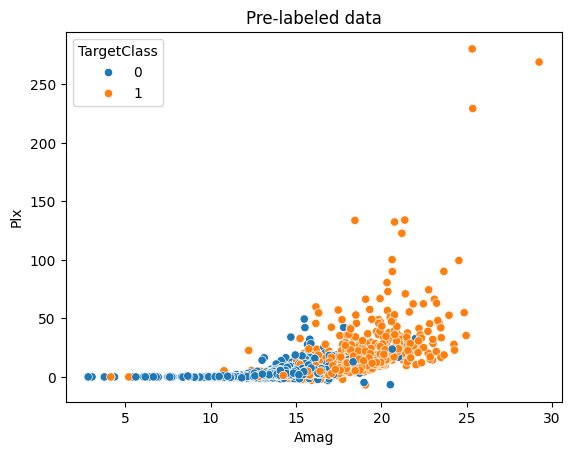

In [11]:
#highest absolute correlation is Vmag and Plx
#Will be using smaller dataset first
X = star3642[['Amag', 'Plx']]
y = star3642[['TargetClass']]
xx = star39552[['Amag', 'Plx']]

sns.scatterplot(data=X, x=X["Amag"], y=X["Plx"], hue=y["TargetClass"])
plt.title("Pre-labeled data")
plt.show()

#### Logistic Regression

Testing on original data (Star3642)
[[315  56]
 [ 80 278]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       371
           1       0.83      0.78      0.80       358

    accuracy                           0.81       729
   macro avg       0.81      0.81      0.81       729
weighted avg       0.81      0.81      0.81       729



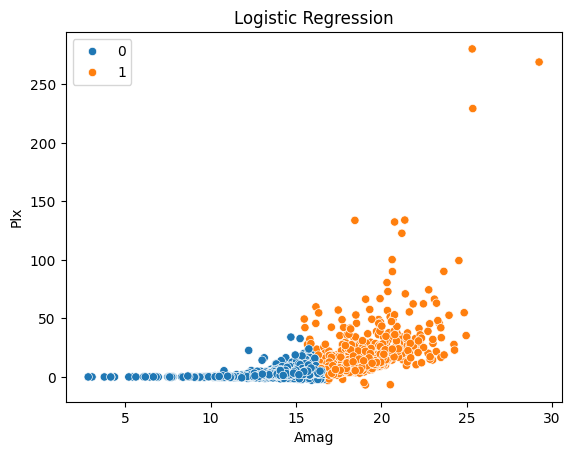

Testing on large labeled data (Star39552)
[[16863  2913]
 [ 6848 12928]]
              precision    recall  f1-score   support

           0       0.71      0.85      0.78     19776
           1       0.82      0.65      0.73     19776

    accuracy                           0.75     39552
   macro avg       0.76      0.75      0.75     39552
weighted avg       0.76      0.75      0.75     39552



In [12]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

#logistic regression model
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["Plx"], hue=y_pred)
plt.title("Logistic Regression")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Naive Bayes

Testing on original data (Star3642)
[[349  22]
 [179 179]]
              precision    recall  f1-score   support

           0       0.66      0.94      0.78       371
           1       0.89      0.50      0.64       358

    accuracy                           0.72       729
   macro avg       0.78      0.72      0.71       729
weighted avg       0.77      0.72      0.71       729



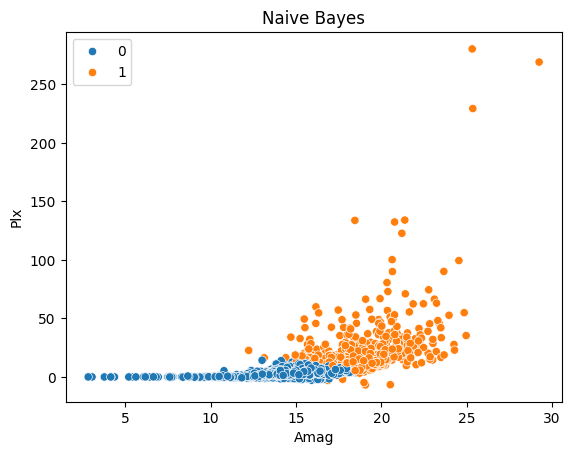

Testing on large labeled data (Star39552)
[[18680  1096]
 [10902  8874]]
              precision    recall  f1-score   support

           0       0.63      0.94      0.76     19776
           1       0.89      0.45      0.60     19776

    accuracy                           0.70     39552
   macro avg       0.76      0.70      0.68     39552
weighted avg       0.76      0.70      0.68     39552



In [13]:
model = GaussianNB()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["Plx"], hue=y_pred)
plt.title("Naive Bayes")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### K-nearest neighbor

Testing on original data (Star3642)
[[298  73]
 [ 91 267]]
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       371
           1       0.79      0.75      0.77       358

    accuracy                           0.78       729
   macro avg       0.78      0.77      0.77       729
weighted avg       0.78      0.78      0.77       729



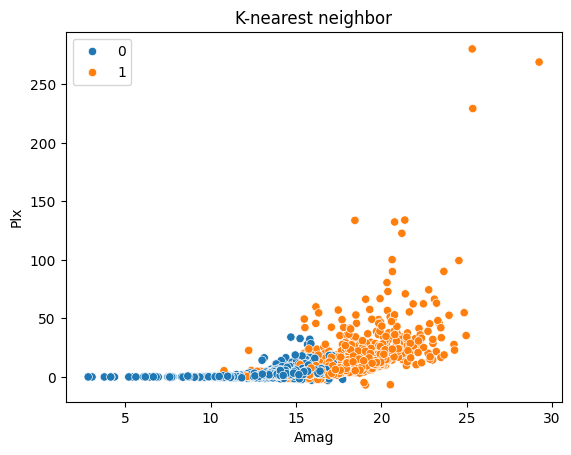

Testing on large labeled data (Star39552)
[[16475  3301]
 [ 7211 12565]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76     19776
           1       0.79      0.64      0.71     19776

    accuracy                           0.73     39552
   macro avg       0.74      0.73      0.73     39552
weighted avg       0.74      0.73      0.73     39552



In [14]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["Plx"], hue=y_pred)
plt.title("K-nearest neighbor")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Decision Tree

Testing on original data (Star3642)
[[277  94]
 [ 96 262]]
              precision    recall  f1-score   support

           0       0.74      0.75      0.74       371
           1       0.74      0.73      0.73       358

    accuracy                           0.74       729
   macro avg       0.74      0.74      0.74       729
weighted avg       0.74      0.74      0.74       729



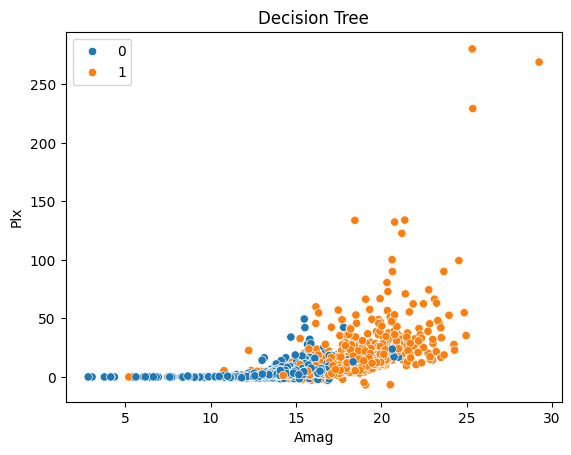

Testing on large labeled data (Star39552)
[[15357  4419]
 [ 7142 12634]]
              precision    recall  f1-score   support

           0       0.68      0.78      0.73     19776
           1       0.74      0.64      0.69     19776

    accuracy                           0.71     39552
   macro avg       0.71      0.71      0.71     39552
weighted avg       0.71      0.71      0.71     39552



In [15]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["Plx"], hue=y_pred)
plt.title("Decision Tree")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Random Forest

Testing on original data (Star3642)
[[310  61]
 [ 90 268]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.80       371
           1       0.81      0.75      0.78       358

    accuracy                           0.79       729
   macro avg       0.79      0.79      0.79       729
weighted avg       0.79      0.79      0.79       729



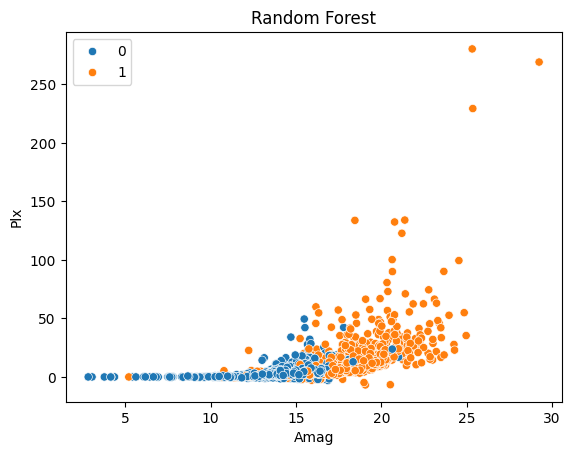

Testing on large labeled data (Star39552)
[[17021  2755]
 [ 7104 12672]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78     19776
           1       0.82      0.64      0.72     19776

    accuracy                           0.75     39552
   macro avg       0.76      0.75      0.75     39552
weighted avg       0.76      0.75      0.75     39552



In [16]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["Plx"], hue=y_pred)
plt.title("Random Forest")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Incorporating PCA

Testing on original data (Star3642)
[[297  74]
 [ 85 273]]
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       371
           1       0.79      0.76      0.77       358

    accuracy                           0.78       729
   macro avg       0.78      0.78      0.78       729
weighted avg       0.78      0.78      0.78       729



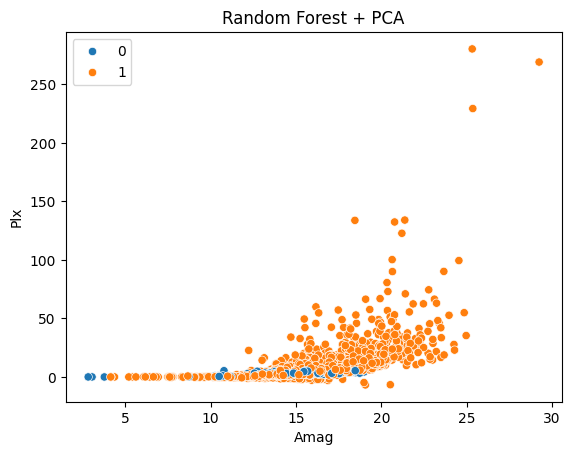

Testing on large labeled data (Star39552)
[[ 5677 14099]
 [ 2998 16778]]
              precision    recall  f1-score   support

           0       0.65      0.29      0.40     19776
           1       0.54      0.85      0.66     19776

    accuracy                           0.57     39552
   macro avg       0.60      0.57      0.53     39552
weighted avg       0.60      0.57      0.53     39552



In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=seed)

print("Testing on original data (Star3642)")
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["Plx"], hue=y_pred)
plt.title("Random Forest + PCA")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

### Amag vs B-V

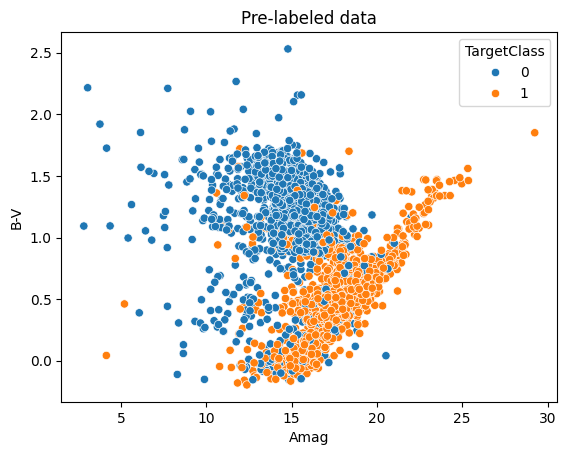

In [18]:
X = star3642[['Amag', 'B-V']]
y = star3642[['TargetClass']]
xx = star39552[['Amag', 'B-V']]


sns.scatterplot(data=X, x=X["Amag"], y=X["B-V"], hue=y["TargetClass"])
plt.title("Pre-labeled data")
plt.show()


#### Logistic Regression

Testing on original data (Star3642)
[[331  40]
 [ 41 317]]
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       371
           1       0.89      0.89      0.89       358

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



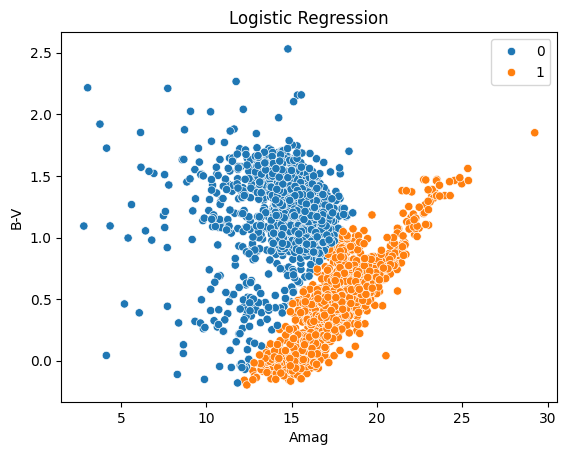

Testing on large labeled data (Star39552)
[[16994  2782]
 [ 2072 17704]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.88     19776
           1       0.86      0.90      0.88     19776

    accuracy                           0.88     39552
   macro avg       0.88      0.88      0.88     39552
weighted avg       0.88      0.88      0.88     39552



In [19]:
#Set training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

#logistic regression model
model = LogisticRegression(random_state=seed)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["B-V"], hue=y_pred)
plt.title("Logistic Regression")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Naive Bayes

Testing on original data (Star3642)
[[329  42]
 [ 36 322]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       371
           1       0.88      0.90      0.89       358

    accuracy                           0.89       729
   macro avg       0.89      0.89      0.89       729
weighted avg       0.89      0.89      0.89       729



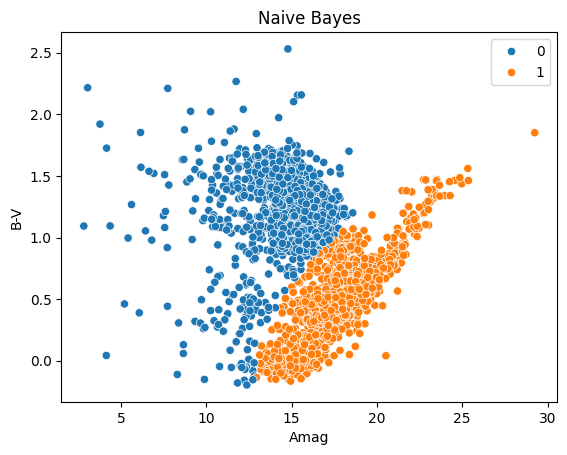

Testing on large labeled data (Star39552)
[[16876  2900]
 [ 1971 17805]]
              precision    recall  f1-score   support

           0       0.90      0.85      0.87     19776
           1       0.86      0.90      0.88     19776

    accuracy                           0.88     39552
   macro avg       0.88      0.88      0.88     39552
weighted avg       0.88      0.88      0.88     39552



In [20]:
model = GaussianNB()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["B-V"], hue=y_pred)
plt.title("Naive Bayes")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### K-nearest neighbor

Testing on original data (Star3642)
[[329  42]
 [ 44 314]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       371
           1       0.88      0.88      0.88       358

    accuracy                           0.88       729
   macro avg       0.88      0.88      0.88       729
weighted avg       0.88      0.88      0.88       729



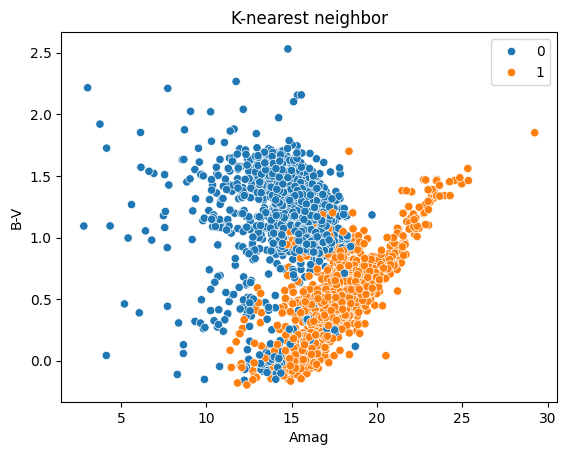

Testing on large labeled data (Star39552)
[[16964  2812]
 [ 2954 16822]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85     19776
           1       0.86      0.85      0.85     19776

    accuracy                           0.85     39552
   macro avg       0.85      0.85      0.85     39552
weighted avg       0.85      0.85      0.85     39552



In [21]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["B-V"], hue=y_pred)
plt.title("K-nearest neighbor")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Decision Tree

Testing on original data (Star3642)
[[309  62]
 [ 59 299]]
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       371
           1       0.83      0.84      0.83       358

    accuracy                           0.83       729
   macro avg       0.83      0.83      0.83       729
weighted avg       0.83      0.83      0.83       729



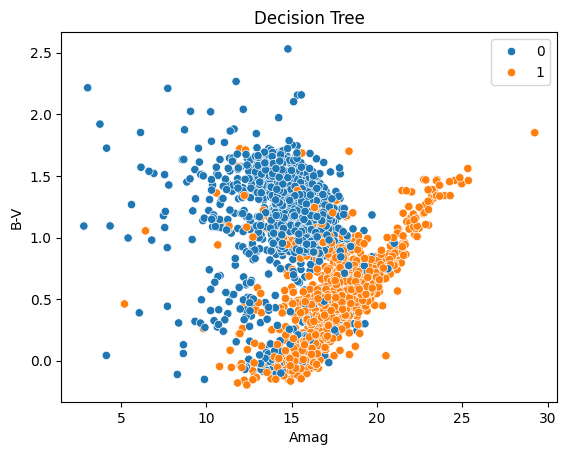

Testing on large labeled data (Star39552)
[[16274  3502]
 [ 3351 16425]]
              precision    recall  f1-score   support

           0       0.83      0.82      0.83     19776
           1       0.82      0.83      0.83     19776

    accuracy                           0.83     39552
   macro avg       0.83      0.83      0.83     39552
weighted avg       0.83      0.83      0.83     39552



In [22]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["B-V"], hue=y_pred)
plt.title("Decision Tree")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Decision Tree

Testing on original data (Star3642)
[[325  46]
 [ 45 313]]
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       371
           1       0.87      0.87      0.87       358

    accuracy                           0.88       729
   macro avg       0.88      0.88      0.88       729
weighted avg       0.88      0.88      0.88       729



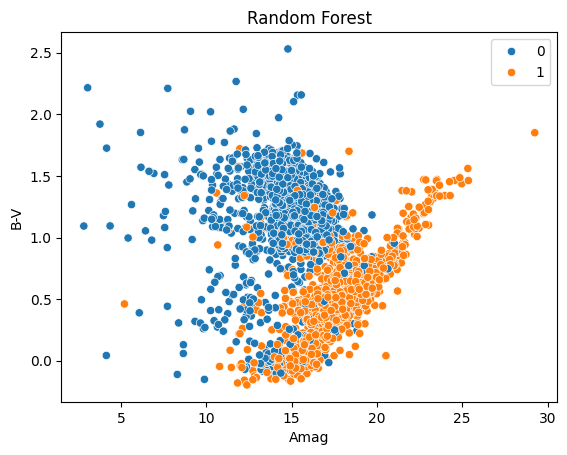

Testing on large labeled data (Star39552)
[[17164  2612]
 [ 2506 17270]]
              precision    recall  f1-score   support

           0       0.87      0.87      0.87     19776
           1       0.87      0.87      0.87     19776

    accuracy                           0.87     39552
   macro avg       0.87      0.87      0.87     39552
weighted avg       0.87      0.87      0.87     39552



In [23]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

print("Testing on original data (Star3642)")
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["B-V"], hue=y_pred)
plt.title("Random Forest")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))

#### Incorporating PCA

Testing on original data (Star3642)
[[325  46]
 [ 47 311]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       371
           1       0.87      0.87      0.87       358

    accuracy                           0.87       729
   macro avg       0.87      0.87      0.87       729
weighted avg       0.87      0.87      0.87       729



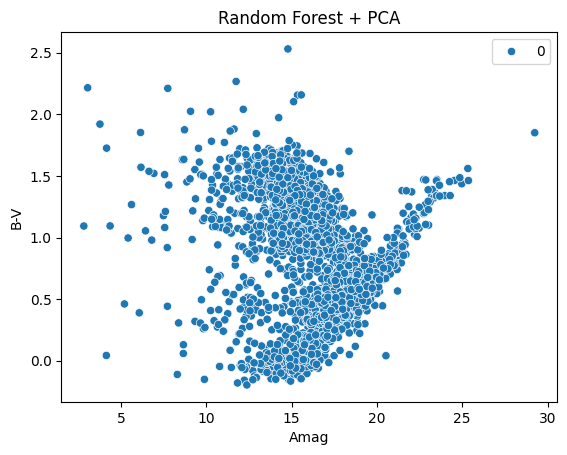

Testing on large labeled data (Star39552)
[[19776     0]
 [19776     0]]
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     19776
           1       0.00      0.00      0.00     19776

    accuracy                           0.50     39552
   macro avg       0.25      0.50      0.33     39552
weighted avg       0.25      0.50      0.33     39552



In [24]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=seed)

print("Testing on original data (Star3642)")
model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

y_pred = model.predict(X)
sns.scatterplot(x=X["Amag"], y=X["B-V"], hue=y_pred)
plt.title("Random Forest + PCA")
plt.show()

print("Testing on large labeled data (Star39552)")

y_pred = model.predict(xx)
print(confusion_matrix(yy, y_pred))
print(classification_report(yy, y_pred))